<h1>Imports</h1>

In [2]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
mt5.initialize()
ativo ='WDO$N'
graf_diario = pd.DataFrame(mt5.copy_rates_from_pos(ativo, mt5.TIMEFRAME_D1, 0, 2000))
graf_diario['Data'] = pd.to_datetime(graf_diario['time'],unit='s')
graf_diario['amplitude'] = (graf_diario['high'] - graf_diario['low'])
graf_diario['amplitude%'] = (graf_diario['high'] - graf_diario['low'])*100/graf_diario['low']
graf_diario['amplitude_media'] = graf_diario['amplitude'].rolling(5).mean()
graf_diario['amplitude%_media'] = graf_diario['amplitude%'].rolling(22).mean()
graf_diario['primeiro_quartil'] = graf_diario['amplitude%'].rolling(22).quantile(q=0.25)
graf_diario['mediana'] = graf_diario['amplitude%'].rolling(22).quantile(q=0.5)
graf_diario['terceiro_quartil'] = graf_diario['amplitude%'].rolling(22).quantile(q=0.75)
dias_noticias = pd.read_excel('dias_noticias.xlsx')
graf_diario['index'] = graf_diario.index
# dias_noticias = pd.to_datetime(dias_noticias['Data'], format="%m-%d-%Y")
dias_de_noticias_graf = graf_diario.merge(dias_noticias,on='Data')
dias_de_noticias_graf[['amplitude','amplitude%','amplitude_media','amplitude%_media']][-22:].describe()

TypeError: Rolling.quantile() missing 1 required positional argument: 'quantile'

In [167]:
graf_diario

,time,open,high,low,close,tick_volume,spread,real_volume,Data,amplitude,amplitude%,amplitude_media,amplitude%_media,primeiro_quartil,mediana,terceiro_quartil,index
0,1539216000,3725.5,3792.0,3721.0,3789.5,573541,500,1551123,2018-10-11,71.0,1.908089,NaN,NaN,NaN,NaN,NaN,0
1,1539561600,3764.0,3770.5,3718.5,3740.0,435153,500,1241389,2018-10-15,52.0,1.398413,NaN,NaN,NaN,NaN,NaN,1
2,1539648000,3725.0,3735.0,3695.5,3730.0,487606,500,1392844,2018-10-16,39.5,1.068868,NaN,NaN,NaN,NaN,NaN,2
3,1539734400,3745.0,3750.0,3667.5,3690.5,546683,500,1592102,2018-10-17,82.5,2.249489,NaN,NaN,NaN,NaN,NaN,3
4,1539820800,3695.5,3736.0,3676.5,3725.0,522113,500,1545841,2018-10-18,59.5,1.618387,60.9,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1696464000,5185.0,5206.0,5167.5,5185.0,881824,500,3318372,2023-10-05,38.5,0.745041,57.1,0.956758,0.735456,0.837823,1.058245,1236
1237,1696550400,5181.5,5237.0,5160.5,5163.0,1079881,500,4034020,2023-10-06,76.5,1.482414,62.9,0.995811,0.748539,0.844068,1.087399,1237
1238,1696809600,5192.0,5199.5,5138.0,5152.5,724009,500,2688711,2023-10-09,61.5,1.196964,66.7,1.012744,0.748539,0.897999,1.171873,1238
1239,1696896000,5155.0,5157.0,5063.0,5071.0,863775,500,3459033,2023-10-10,94.0,1.856607,65.0,1.071137,0.759976,0.969300,1.222507,1239


<h1>Estudo dias de notícia</h1>

In [168]:
'''Noticias que levamos em consideração : 
    Payroll
    Pedidos Iniciais por Seguro-Desemprego
    Núcleo do Índice de Preços ao Consumidor (IPC) (Mensal)
    Declaração do Comitê Federal de Mercado Aberto (FOMC)
    Taxa-alvo de Fundos da Reserva Federal (Fed)
    Índice de atividade dos gerentes de compras (PMI) Industrial do ISM
'''
#dias_de_noticias_graf = dias_de_noticias_graf[['Data','open','high','low','close','amplitude','amplitude%','amplitude_media','amplitude%_media','index']] 
media = dias_de_noticias_graf.loc[dias_de_noticias_graf['amplitude'] > dias_de_noticias_graf['amplitude_media']].shape
um_quartil = dias_de_noticias_graf.loc[dias_de_noticias_graf['amplitude%'] > dias_de_noticias_graf['primeiro_quartil']].shape
mediana = dias_de_noticias_graf.loc[dias_de_noticias_graf['amplitude%'] > dias_de_noticias_graf['mediana']].shape
terceiro_quartil = dias_de_noticias_graf.loc[dias_de_noticias_graf['amplitude%'] > dias_de_noticias_graf['terceiro_quartil']].shape


In [169]:
f'''Probabilidade de um dia de notícia ser acima da média é de {media[0]/len(dias_de_noticias_graf['Data'])}'''

'Probabilidade de um dia de notícia ser acima da média é de 0.53125'

In [170]:
f'''Probabilidade de um dia de notícia ser acima DO PRIMEIRO QUARTIL é de {um_quartil[0]/len(dias_de_noticias_graf['Data'])}'''

'Probabilidade de um dia de notícia ser acima DO PRIMEIRO QUARTIL é de 0.78125'

In [165]:
f'''Probabilidade de um dia de notícia ser acima da MEDIANA é de {mediana[0]/len(dias_de_noticias_graf['Data'])}'''

'Probabilidade de um dia de notícia ser acima da MEDIANA é de 0.6015625'

In [67]:
f'''Probabilidade de um dia de notícia ser acima da TERCEIRO QUARTIL é de {terceiro_quartil[0]/len(dias_de_noticias_graf['Data'])}'''

'Probabilidade de um dia de notícia ser acima da TERCEIRO QUARTIL é de 0.3671875'

<h1>Dias antes</h1>

In [145]:
index = dias_de_noticias_graf['index'].values
dia_anterior_1 = index-1
dia_anterior = graf_diario.iloc[dia_anterior_1]
media = dia_anterior.loc[dia_anterior['amplitude%'] < dia_anterior['amplitude%_media']].shape
um_quartil = dia_anterior.loc[dia_anterior['amplitude%'] < dia_anterior['primeiro_quartil']].shape
mediana = dia_anterior.loc[dia_anterior['amplitude%'] < dia_anterior['mediana']].shape
terceiro_quartil = dia_anterior.loc[dia_anterior['amplitude%'] < dia_anterior['terceiro_quartil']].shape

In [146]:
f'''Probabilidade de um dia de notícia ser acima da média é de {media[0]/len(dia_anterior['Data'])}'''

'Probabilidade de um dia de notícia ser acima da média é de 0.5703125'

In [147]:
f'''Probabilidade de um dia de notícia ser acima DO PRIMEIRO QUARTIL é de {um_quartil[0]/len(dia_anterior['Data'])}'''

'Probabilidade de um dia de notícia ser acima DO PRIMEIRO QUARTIL é de 0.2578125'

In [148]:
f'''Probabilidade de um dia de notícia ser acima da MEDIANA é de {mediana[0]/len(dia_anterior['Data'])}'''

'Probabilidade de um dia de notícia ser acima da MEDIANA é de 0.4765625'

In [149]:
f'''Probabilidade de um dia de notícia ser acima da TERCEIRO QUARTIL é de {terceiro_quartil[0]/len(dia_anterior['Data'])}'''

'Probabilidade de um dia de notícia ser acima da TERCEIRO QUARTIL é de 0.71875'

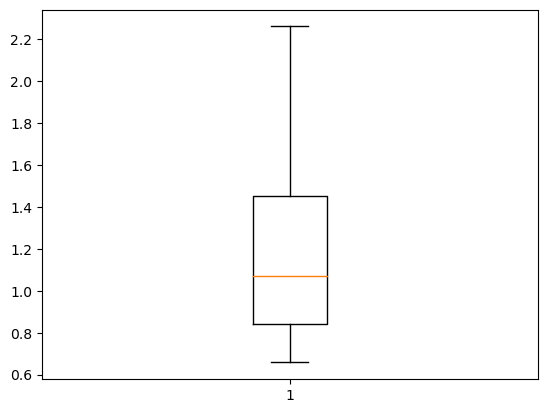

In [174]:
plt.boxplot(dias_de_noticias_graf['amplitude%'][-22:])
plt.show()